In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
wine_quality=pd.read_csv('./data/winequality-red.csv')
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


In [19]:
wine_quality.columns=['fixed_acidity', 'volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']

In [20]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
wine_quality['fixed_acidity']=np.log(wine_quality.fixed_acidity+1)
wine_quality['volatile_acidity']=np.log(wine_quality.volatile_acidity+1)
wine_quality['citric_acid']=np.log(wine_quality.citric_acid+1)
wine_quality['residual_sugar']=np.log(wine_quality.residual_sugar+1)
wine_quality['chlorides']=np.log(wine_quality.chlorides+1)
wine_quality['free_sulfur_dioxide']=np.log(wine_quality.free_sulfur_dioxide+1)
wine_quality['total_sulfur_dioxide']=np.log(wine_quality.total_sulfur_dioxide+1)
wine_quality['density']=np.log(wine_quality.density+1)
wine_quality['pH']=np.log(wine_quality.pH+1)
wine_quality['sulphates']=np.log(wine_quality.sulphates+1)
wine_quality['alcohol']=np.log(wine_quality.alcohol+1)

In [22]:
wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,2.128,0.531,0.000,1.065,0.073,2.485,3.555,0.692,1.506,0.445,2.342,5
1,2.175,0.631,0.000,1.281,0.093,3.258,4.220,0.692,1.435,0.519,2.380,5
2,2.175,0.565,0.039,1.194,0.088,2.773,4.007,0.692,1.449,0.501,2.380,5
3,2.501,0.247,0.445,1.065,0.072,2.890,4.111,0.692,1.426,0.457,2.380,6
4,2.128,0.531,0.000,1.065,0.073,2.485,3.555,0.692,1.506,0.445,2.342,5


In [7]:
Y = wine_quality['quality']
X = wine_quality[['fixed_acidity', 'volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)


In [9]:
ols_model = LinearRegression()
ols_model.fit(X_train,Y_train)

ols_model_train_predict = ols_model.predict(X_train)
ols_model_test_predict = ols_model.predict(X_test)

log_result_ols=[]
log_result_ols.append((mse(Y_test,ols_model_test_predict),rmse(Y_test,ols_model_test_predict),ols_model.score(X_test,Y_test),
                         mse(Y_train, ols_model_train_predict),rmse(Y_train, ols_model_train_predict),ols_model.score(X_train,Y_train)))

log_result_ols=pd.DataFrame(log_result_ols,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train'])
log_result_ols

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train
0,0.361,0.601,0.285,0.431,0.657,0.373


In [10]:
alpha_list=[10**x for x in range(-3,3)]

In [11]:
from sklearn.linear_model import Ridge
log_result_ridge=[]


for alpha in alpha_list:
    ridgeregr = Ridge(alpha=alpha) 
    ridgeregr.fit(X_train, Y_train)

    Y_preds_train = ridgeregr.predict(X_train)
    Y_preds_test = ridgeregr.predict(X_test)
    log_result_ridge.append((mse(Y_test, Y_preds_test),rmse(Y_test, Y_preds_test),ridgeregr.score(X_test, Y_test),
                         mse(Y_train, Y_preds_train),rmse(Y_train, Y_preds_train),ridgeregr.score(X_train, Y_train),alpha))
    

log_result_ridge=pd.DataFrame(log_result_ridge,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train','Alpha'])
log_result_ridge

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train,Alpha
0,0.362,0.602,0.284,0.432,0.657,0.372,0.001
1,0.362,0.601,0.284,0.432,0.657,0.372,0.010
2,0.359,0.599,0.290,0.432,0.657,0.372,0.100
3,0.346,0.588,0.316,0.435,0.660,0.367,1.000
4,0.342,0.585,0.323,0.476,0.690,0.307,10.000
5,0.419,0.647,0.171,0.596,0.772,0.133,100.000


In [12]:
from sklearn.linear_model import Lasso
log_result_lasso=[]


for alpha in alpha_list:
    lassoregr = Lasso(alpha=alpha) 
    lassoregr.fit(X_train, Y_train)

    Y_preds_train = lassoregr.predict(X_train)
    Y_preds_test = lassoregr.predict(X_test)
    log_result_lasso.append((mse(Y_test, Y_preds_test),rmse(Y_test, Y_preds_test),lassoregr.score(X_test, Y_test),
                         mse(Y_train, Y_preds_train),rmse(Y_train, Y_preds_train),lassoregr.score(X_train, Y_train),alpha))
    

log_result_lasso=pd.DataFrame(log_result_lasso,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train','Alpha'])
log_result_lasso

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train,Alpha
0,0.349,0.591,0.309,0.436,0.660,0.366,0.001
1,0.345,0.587,0.318,0.468,0.684,0.319,0.010
2,0.510,0.714,-0.008,0.688,0.829,0.000,0.100
3,0.510,0.714,-0.008,0.688,0.829,0.000,1.000
4,0.510,0.714,-0.008,0.688,0.829,0.000,10.000
5,0.510,0.714,-0.008,0.688,0.829,0.000,100.000


In [13]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

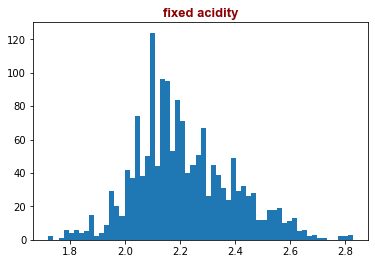

In [14]:
plt.hist(wine_quality.fixed_acidity,bins=60)
plt.title('fixed acidity', fontdict=title_font)
plt.show()

In [15]:
wine_quality.fixed_acidity[wine_quality.fixed_acidity>2.7]=2.7

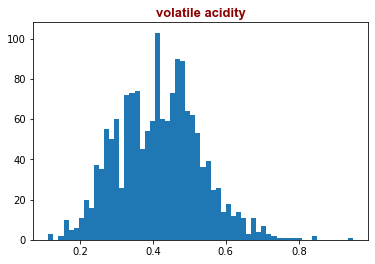

In [16]:
plt.hist(wine_quality.volatile_acidity,bins=60)
plt.title('volatile acidity', fontdict=title_font)
plt.show()

In [17]:
wine_quality.volatile_acidity[wine_quality.volatile_acidity>0.8]=0.8

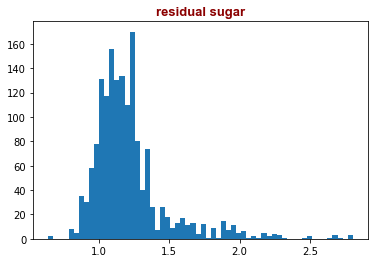

In [18]:
plt.hist(wine_quality.residual_sugar,bins=60)
plt.title('residual sugar', fontdict=title_font)
plt.show()

In [19]:
wine_quality.residual_sugar[wine_quality.residual_sugar>2.5]=2.5

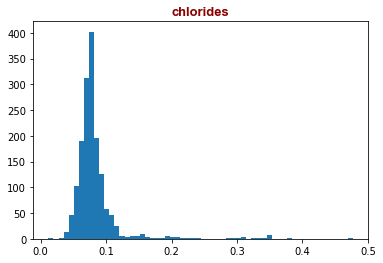

In [20]:
plt.hist(wine_quality.chlorides,bins=60)
plt.title('chlorides', fontdict=title_font)
plt.show()

In [21]:
wine_quality.chlorides[wine_quality.chlorides>0.25]=0.25

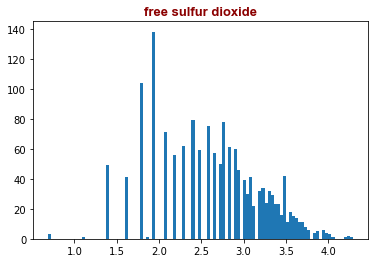

In [22]:
plt.hist(wine_quality.free_sulfur_dioxide,bins=100)
plt.title('free sulfur dioxide', fontdict=title_font)
plt.show()

In [23]:
wine_quality.free_sulfur_dioxide[wine_quality.free_sulfur_dioxide>4.0]=4.0

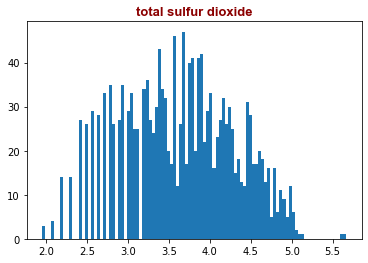

In [24]:
plt.hist(wine_quality.total_sulfur_dioxide,bins=100)
plt.title('total sulfur dioxide', fontdict=title_font)
plt.show()

In [25]:
wine_quality.total_sulfur_dioxide[wine_quality.total_sulfur_dioxide>5.0]=5.0

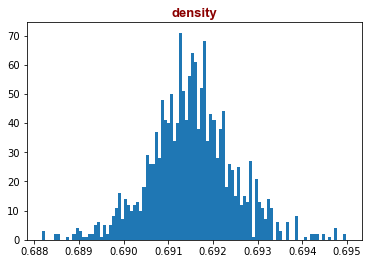

In [26]:
plt.hist(wine_quality.density,bins=100)
plt.title('density', fontdict=title_font)
plt.show()

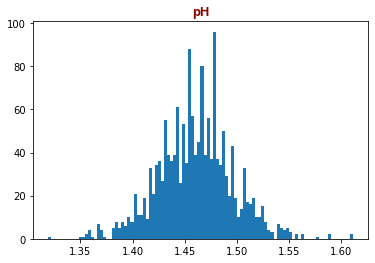

In [27]:
plt.hist(wine_quality.pH,bins=100)
plt.title('pH', fontdict=title_font)
plt.show()

In [28]:
wine_quality.pH[wine_quality.pH>1.55]=1.55

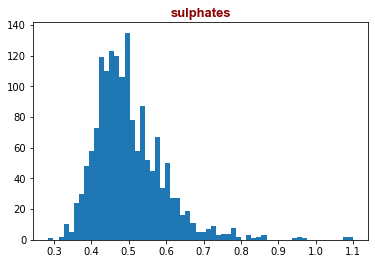

In [29]:
plt.hist(wine_quality.sulphates,bins=60)
plt.title('sulphates', fontdict=title_font)
plt.show()

In [30]:
wine_quality.sulphates[wine_quality.sulphates>0.8]=0.8

In [31]:
Y = wine_quality['quality']
X = wine_quality[['fixed_acidity', 'volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [32]:
ols_model = LinearRegression()
ols_model.fit(X_train,Y_train)

ols_model_train_predict = ols_model.predict(X_train)
ols_model_test_predict = ols_model.predict(X_test)

log_wins_ols=[]
log_wins_ols.append((mse(Y_test,ols_model_test_predict),rmse(Y_test,ols_model_test_predict),ols_model.score(X_test,Y_test),
                         mse(Y_train, ols_model_train_predict),rmse(Y_train, ols_model_train_predict),ols_model.score(X_train,Y_train)))

log_wins_ols=pd.DataFrame(log_wins_ols,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train'])
log_wins_ols

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train
0,0.351,0.593,0.305,0.431,0.656,0.374


In [33]:
alpha_list=[10**x for x in range(-3,3)]

from sklearn.linear_model import Ridge
log_wins_ridge=[]


for alpha in alpha_list:
    ridgeregr = Ridge(alpha=alpha) 
    ridgeregr.fit(X_train, Y_train)

    Y_preds_train = ridgeregr.predict(X_train)
    Y_preds_test = ridgeregr.predict(X_test)
    log_wins_ridge.append((mse(Y_test, Y_preds_test),rmse(Y_test, Y_preds_test),ridgeregr.score(X_test, Y_test),
                         mse(Y_train, Y_preds_train),rmse(Y_train, Y_preds_train),ridgeregr.score(X_train, Y_train),alpha))
    

log_wins_ridge=pd.DataFrame(log_wins_ridge,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train','Alpha'])
log_wins_ridge

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train,Alpha
0,0.352,0.593,0.304,0.431,0.657,0.373,0.001
1,0.352,0.593,0.304,0.431,0.657,0.373,0.010
2,0.349,0.591,0.309,0.432,0.657,0.372,0.100
3,0.339,0.582,0.330,0.435,0.660,0.367,1.000
4,0.340,0.583,0.328,0.476,0.690,0.307,10.000
5,0.418,0.647,0.173,0.595,0.772,0.134,100.000


In [34]:
from sklearn.linear_model import Lasso
log_wins_lasso=[]


for alpha in alpha_list:
    lassoregr = Lasso(alpha=alpha) 
    lassoregr.fit(X_train, Y_train)

    Y_preds_train = lassoregr.predict(X_train)
    Y_preds_test = lassoregr.predict(X_test)
    log_wins_lasso.append((mse(Y_test, Y_preds_test),rmse(Y_test, Y_preds_test),lassoregr.score(X_test, Y_test),
                         mse(Y_train, Y_preds_train),rmse(Y_train, Y_preds_train),lassoregr.score(X_train, Y_train),alpha))
    

log_wins_lasso=pd.DataFrame(log_wins_lasso,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train','Alpha'])
log_wins_lasso

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train,Alpha
0,0.342,0.585,0.322,0.436,0.660,0.366,0.001
1,0.342,0.585,0.323,0.467,0.683,0.321,0.010
2,0.510,0.714,-0.008,0.688,0.829,0.000,0.100
3,0.510,0.714,-0.008,0.688,0.829,0.000,1.000
4,0.510,0.714,-0.008,0.688,0.829,0.000,10.000
5,0.510,0.714,-0.008,0.688,0.829,0.000,100.000


In [4]:
results={'Model Name':['Base','Winsorize','Log','Log-Winsorize', 'Winsorize-Log'],
        'mse Test':[0.342,0.335,0.342,0.339,0.339],
         'Rmse Test':[0.585,0.579,0.585,0.582,0.582],
         'RSquare Test':[0.324,0.336,0.323,0.330,0.330],
         'mse Train':[0.444,0.443,0.476,0.435,0.437],
         'Rmse Train':[0.666,0.666,0.690,0.660,0.661],
         'RSquare Train':[0.354,0.355,0.307,0.367,0.364]
        }
results=pd.DataFrame(results)
results

,Model Name,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train
0,Base,0.342,0.585,0.324,0.444,0.666,0.354
1,Winsorize,0.335,0.579,0.336,0.443,0.666,0.355
2,Log,0.342,0.585,0.323,0.476,0.690,0.307
3,Log-Winsorize,0.339,0.582,0.330,0.435,0.660,0.367
4,Winsorize-Log,0.339,0.582,0.330,0.437,0.661,0.364
